In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Deflategate
Deflategate was a huge scandal in American NFL. In 2015, The Patriots and The Colts were against each other in NFL semifinals. Each team has its own football and they are responsible for maintaining the pressure of each football. Footballs need to be ensured that they have the right pressure because flatter football is easier to catch. The NFL requirement for football pressure is 12.5 to 13.5 psi. 

During the second quarter, one of the Colts intercepted the Patriots' football. The player that intercepted the football felt the ball was flat. Thus, the Patriots' was suspected to purposely make their footballs flatter than they should be. During the halftime, the footballs' pressures were investigated. The NFL hired an external law firm to investigate whether the footballs were deflated and whether The Patriots' were cheating. 

In this case, the question is, "Did the Patriots' deflate their football?"

Let's examine the football and see if they were indeed deflated. Below is the data obtained from the law firm that investigated the case. There were 2 officials that investigated the footballs: Blakeman and Prioleau. They only managed to measure 4 of the Colts' footballs before the half-time were over. The footballs' pressure data are in psi.

In [2]:
football = Table.read_table('deflategate.csv')
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


What other information do we need to know to do analysis with this data? Or what else do we want to know?

The reason these questions are important is because in real life, there will be no guide or steps on what we need to do. We only have the dataset. It is up to us to figure out what information we can get from the data and what else we need to know.

The main question here: "Were the Patriots' footballs more deflated than the Colts'?"

At the beginning of the game, both teams had their footballs' pressure checked by the officials. We can assume that at the beginning of the game, both teams' footballs were within the standard range. The dataset that we have are the footballs' pressure during half-time.

When we have a dataset, the first few steps are:
1. Look at the data
2. Ask more questions
3. Do small / initial data manipulations and analysis that will give us measures or values that will help us answering the questions

Since we have 2 different measurements, we can take the average of the 2. Below is the resulting array when taking the average,

In [3]:
averages = (football.column('Blakeman') + football.column('Prioleau')) / 2

Now we can add array above as a new column in the original table. We name the data below `temp` since this is going to be a temporary analysis.

In [4]:
temp = football.with_column('Average at halftime', averages)
temp

Team,Blakeman,Prioleau,Average at halftime
Patriots,11.5,11.8,11.65
Patriots,10.85,11.2,11.025
Patriots,11.15,11.5,11.325
Patriots,10.7,11,10.85
Patriots,11.1,11.45,11.275
Patriots,11.6,11.95,11.775
Patriots,11.85,12.3,12.075
Patriots,11.1,11.55,11.325
Patriots,10.95,11.35,11.15
Patriots,10.5,10.9,10.7


Recall that the NFL football standard is 12.5 to 13.5 psi **at the beginning of the game**. It is normal for footballs to deflate along the game. It turns out that at the beginning of the game, the Patriots' football pressure were at the minimum standard (around 12.5 psi) while the Colts' football pressures were higher (around 13 psi).

If both teams footballs' starting pressure were different, we can't just measure the end pressures at halftime and take conclusion. It could be just the case that since the Colts' footballs were more deflated at the beginning, the pressures seemed even lower at halftime.

What we can do is to measure the footballs' **pressure drop** between the pressure at the start of the game and at halftime.

At first, we need a collection of initial pressures for both teams. From the original `football` table, there are 11 Patriots' rows and 4 Colts' rows in order. Assume that the Patriots' footballs started at 12.5 psi, while the Colts' footballs started at 13. Thus, we need 11 of 12.5 psis and 4 of 13 psis. The function `np.ones` comes in handy in this case.

In [5]:
np.ones?

If we give an input `3`, `np.ones` will give us an array of 1 with the length of 3 elements.

In [6]:
np.ones(3)

array([1., 1., 1.])

We can use this to generate initial pressure array. Below is the initial pressure array for the Patriots,

In [7]:
np.ones(11) * 12.5

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5])

While below is the the initial pressure array for the Colts,

In [8]:
np.ones(4) * 13

array([13., 13., 13., 13.])

Using `np.append`, we combine the 2 arrays above into one.

In [9]:
initials = np.append(np.ones(11) * 12.5, np.ones(4) * 13)
initials

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

And now we can add the `initials` above to the `temp` table,

In [10]:
temp = temp.with_column('Estimate at start', initials)
temp.show()

Team,Blakeman,Prioleau,Average at halftime,Estimate at start
Patriots,11.5,11.8,11.65,12.5
Patriots,10.85,11.2,11.025,12.5
Patriots,11.15,11.5,11.325,12.5
Patriots,10.7,11,10.85,12.5
Patriots,11.1,11.45,11.275,12.5
Patriots,11.6,11.95,11.775,12.5
Patriots,11.85,12.3,12.075,12.5
Patriots,11.1,11.55,11.325,12.5
Patriots,10.95,11.35,11.15,12.5
Patriots,10.5,10.9,10.7,12.5


With the table above, we can calculate the pressure drop by subtracting the `Estimate at start` with `Average at halftime`.

In [11]:
temp = temp.with_column('Drop', temp.column('Estimate at start') - temp.column('Average at halftime'))
temp

Team,Blakeman,Prioleau,Average at halftime,Estimate at start,Drop
Patriots,11.5,11.8,11.65,12.5,0.85
Patriots,10.85,11.2,11.025,12.5,1.475
Patriots,11.15,11.5,11.325,12.5,1.175
Patriots,10.7,11,10.85,12.5,1.65
Patriots,11.1,11.45,11.275,12.5,1.225
Patriots,11.6,11.95,11.775,12.5,0.725
Patriots,11.85,12.3,12.075,12.5,0.425
Patriots,11.1,11.55,11.325,12.5,1.175
Patriots,10.95,11.35,11.15,12.5,1.35
Patriots,10.5,10.9,10.7,12.5,1.8


Now we can create a separate table that only contains the necessary information,

In [12]:
drops = temp.select('Team', 'Drop')
drops

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


Typically, when we reached the point where we have a data that we think is comparable, the next step is to create a visualization. What visualization is the best to visualize the difference between the Patriots' drops and the Colts' drops?

When we have numerical data, usually we want to use histogram to see the distribution. Ideally, we want to create an overlay histogram, one color for the Patriots' distibution, another color for Colts'. Unfortunately, we can't do that since overlay histogram requires 2 columns of numerical data with the same length. We have 11 rows for Patriots but only 4 rows for Colts. 

Instead, we can visualize the 2 histogram separately while making sure the x-axis matches.

(0.25, 1.9)

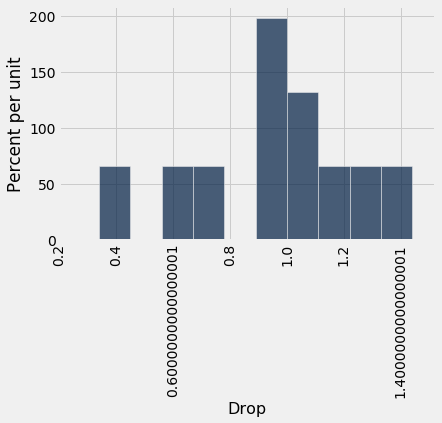

In [13]:
drops.where('Team', 'Patriots').hist('Drop')
plt.xlim(0.25, 1.9)

(0.25, 1.9)

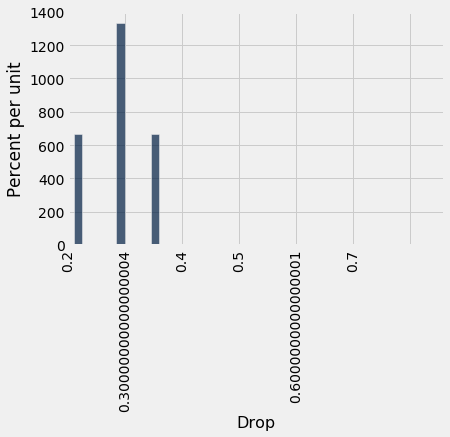

In [14]:
drops.where('Team', 'Colts').hist('Drop')
plt.xlim(0.25, 1.9)

It does seem that the 2 histograms above are different. Is the difference significant? Is it likely to occur by chance if the 2 teams' footballs had the same pressure drop overall? This is when we do hypothesis test on the data.

`Null hypothesis`: The Patriots and the Colts pressure drops came from the same distribution.

If the `null` is true, this means there is no foul play, it just happened to be that the Patriots' footballs started in different pressures.

`Alternative hypothesis`: No, they don't came from the same distribution. Something else was in effect.

Once we decided the hypotheses, the next step is to choose the `test statistic` to measure how far we are from the `null`. What's a good `test statistic` for this case?

### Idea: average of the pressure drop of each team.

In [15]:
drops.group('Team', np.average)

Team,Drop average
Colts,0.46875
Patriots,1.20227


Indeed, it seems that the Patriots' average drop is greater than that of Colts. We can try computing the average pressure drop difference.

In [16]:
averages = drops.group('Team', np.average).column(1)
averages.item(0) - averages.item(1)

-0.733522727272728

Recall that the `alternative` hypothesis was that the 2 teams' pressure drop did not came from the same distribution. Either team could have the greater drop, but we are trying to measure whether the 2 teams' drops distributions are equal. It does not matter who had the greater drop, all we want to know is that there is a difference.In this case, we take the absolute value. 

In [17]:
abs(averages.item(0) - averages.item(1))

0.733522727272728

We can create a function for the steps above. The function `difference_in_average_drop` takes a table that contains 2 columns:
1. Team names (there can only be 2 different team names in the table. No more, no less)
2. Pressure drops

And the function returns the absolute value of the difference of the average pressure drop between the 2 teams.

In [18]:
def difference_in_average_drop(t):
    averages = t.group('Team', np.average).column(1)
    return abs(averages.item(0) - averages.item(1))

difference_in_average_drop(drops)

0.733522727272728

Above is our `observed test statistic`.

Now that we have chosen a `test statistic`, the next step is simulation. 

1. Assume the `null` is true
2. Simulate taking multiple samples
3. Calculate the `test statistic` (absolute difference in average pressure drops)
4. Create a visualization of the distribution of the `test statistic`
5. See if the `observed test statistic` is likely to come from the `null` distribution

Now the big question is, **how do we draw samples?**

In [19]:
drops.show()

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


Taking sample in this case is not as easy as before. Previously in the coin example, we can just simulate coin flipping. In this case, the `null` says that the drops between the 2 teams are about the same, but we don't know the exact number of the drops. 

# Comparing 2 Samples
When we have 2 samples, we need to have a method of comparing the 2 samples. In our case, we want to know if our 2 samples are different. The trick is **`permutation test`**.

## Permutation Test
The idea is that we are testing whether 2 samples are drawn randomly from the same distribution. Attribute distributions (e.g. pressure drops) are the same for both classes (samples).

If the `null` is true, all rearrangements of the attribute values among the 2 classes / samples are equally likely.

So how the analysis work is as the following,
1. Compute `observed test statistic`
2. Shuffle the attribute values
3. Recompute `test statistic`
4. Repeat step 2 and 3, and create **the distribution of `test statistic` under null hypothesis**
5. Compare distribution with `observed test statistic`.



If the Colts' and Patriots' pressure drops came from the same distribution (e.g. roughly the same drops, average, variation), 
<img src = 'permutation.jpg' width = 500/>
(The Patriot's drops represented in blue box, Colts' represented in orange box)

Then shuffling the pressure drops values for both teams should not affect the outcome.

Below we have the original table,

In [20]:
drops

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


Again, we will need to use the `sample` method. If we didn't specify the number of samples we want, by default `sample` will sample all the rows in the table. Make sure that sample without replacement since we don't want duplicate values!

In [21]:
drops.sample(with_replacement = False)

Team,Drop
Patriots,1.175
Colts,0.275
Patriots,1.475
Colts,0.65
Patriots,1.65
Patriots,0.85
Patriots,0.425
Colts,0.475
Colts,0.475
Patriots,1.375


The problem with the sample above is that the assignment of the team is still the same as the original table, thus the above table is basically the original table. If we compute the `test statistic` with the table above, the result would be the same as the `observed test statistic`.

Instead, we can take only the `Drop` values and shuffle it.

In [22]:
shuffled = drops.select('Drop').sample(with_replacement = False)
shuffled

Drop
0.65
1.65
1.175
0.475
0.85
0.425
1.475
0.275
1.8
1.175


Now we can replace the `Drop` in the original table with the data above.

In [23]:
sample = drops.select('Team').with_column('Drop', shuffled.column(0))
sample

Team,Drop
Patriots,0.65
Patriots,1.65
Patriots,1.175
Patriots,0.475
Patriots,0.85
Patriots,0.425
Patriots,1.475
Patriots,0.275
Patriots,1.8
Patriots,1.175


We can visualize our sample to see if the drops are indeed shuffled,

(0.25, 1.9)

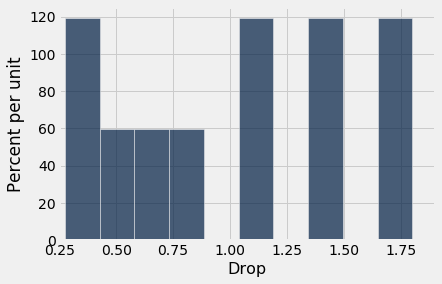

In [24]:
sample.where('Team', 'Patriots').hist('Drop')
plt.xlim(0.25, 1.9)

(0.25, 1.9)

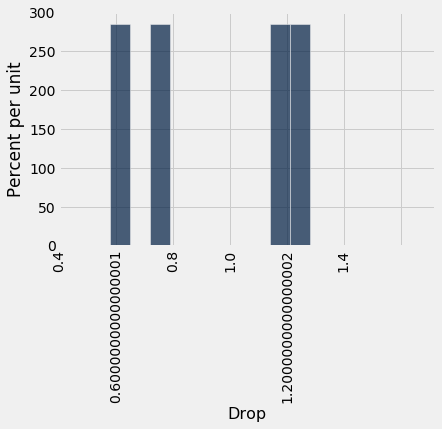

In [25]:
sample.where('Team', 'Colts').hist('Drop')
plt.xlim(0.25, 1.9)

And we can calculate the `test statistic` of this sample,

In [26]:
difference_in_average_drop(sample)

0.08579545454545334

If we want do repeat the steps above multiple times, we can start with gathering the necessary codes:

In [27]:
shuffled = drops.select('Drop').sample(with_replacement = False)
sample = drops.select('Team').with_column('Drop', shuffled.column(0))
difference_in_average_drop(sample)

0.26477272727272805

And indeed, if we run the cell above multiple times, we obtain different results! Now we can create a `for` loop out of the code above.

In [28]:
repetitions = 10000
test_stats = make_array()

for i in np.arange(repetitions):
    shuffled = drops.select('Drop').sample(with_replacement = False)
    sample = drops.select('Team').with_column('Drop', shuffled.column(0))
    test_stats = np.append(test_stats, difference_in_average_drop(sample))
    
test_stats

array([0.23806818, 0.09431818, 0.68125   , ..., 0.11875   , 0.2125    ,
       0.13693182])

Now we can create a table out of the array above and make a histogram,

In [29]:
null = Table().with_column('Test Statistics Distribution', test_stats)
null

Test Statistics Distribution
0.238068
0.0943182
0.68125
0.324432
0.000568182
0.230682
0.0676136
0.435227
0.221023
0.188068


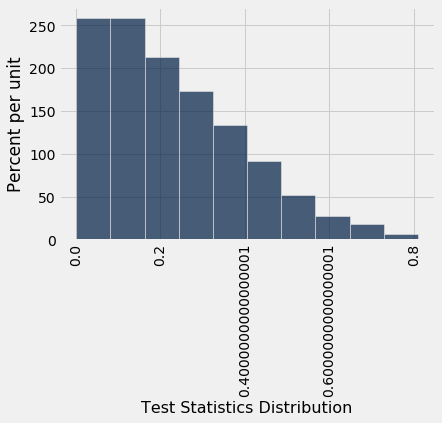

In [30]:
null.hist()

As we can see, most of the values are close to 0, which makes sense because:

1. The `null` hypothesis is that the 2 teams' pressure drops came from the same distribution
2. The `test statistic` is the absolute difference of the average pressure drops of the 2 teams
3. If they came from the same distribution, if we shuffle the data and calculate the `test statistic`, chances are the result should be close to 0

Now recall the `observed test statistic`,

In [31]:
observed = difference_in_average_drop(drops)
observed

0.733522727272728

Below we have visualization of the `observed test statistic` and the distribution of the `test statistic` assuming the `null` is true, with varying number of samples.

In [32]:
def plot_null_n_samples(n=1):
    (Table().with_column('Null distribution', test_stats[:n])
     .hist(bins=np.arange(0, 0.9, 0.05)))
    plt.plot([observed, observed], [0, 3])
    plt.ylim(0, 3)
    plt.show()

_ = interact(plot_null_n_samples, n=(1, 10001, 200))

interactive(children=(IntSlider(value=1, description='n', max=10001, min=1, step=200), Output()), _dom_classes…

All that is left is to compute the `P-value`. Recall the `test_stats` array that contains all our test statistics from the `for` loop.

In [33]:
test_stats

array([0.23806818, 0.09431818, 0.68125   , ..., 0.11875   , 0.2125    ,
       0.13693182])

First we find the `test statistic` that are greater than or equal to the `observed test statistic`,

In [34]:
test_stats >= observed

array([False, False, False, ..., False, False, False])

Then we can calculate the number of `True`s and divide it with the length of the array to obtain the `P-value`

In [35]:
np.count_nonzero(test_stats >= observed) / len(test_stats)

0.0049

Above, the `P-value` is less than 1%, which means that the result is highly statistically significant. We can conclude that there is indeed significant difference between the 2 teams' football pressure drops.

## Official Analysis
Indeed, the official found this to be suspicious as well.

"[T]he average pressure drop of the Patriots game balls exceeded the average pressure drop of the Colt balls by 0.45 to 1.02 psi, depending on various possible assumptions regarding the gauges used, and assuming an initial pressure of 12.5 psi for the Patriots' balls and 13.0 for the Colts balls." -- *Investigative report commissioned by the NFL regarding the AFC Championship game on January 18, 2015*

Notice in the report above, the range of average pressure drop was calculated as well (0.45 to 1.02). This will be discussed in future lectures.

Our test is limited in terms of reaching to a conclusion due to the way we constructed the `null` and `alternative` hypothesis.  We can only conclude that there were some differences between the 2 teams' football drops. We can't say how great the difference were, nor whether Patriots' or the Colts' football pressure dropped more. 

On the other hand, the official investigation used statistical analysis along with text messages among the players and other factors. 

## Recap

All this time, we had been going over examples with one sample (e.g. one sample of warplanes serial numbers, one set of dice rolls). 

In this lecture, we went over an example with 2 samples. We compared both and see if there are any difference between the 2. In real world practice, it is often desirable and more often to have 2 samples. For example, in medicine research, we want to see whether our treatment is better than our control, or whether something else is in effect.

The typical `null` hypothesis with 2 samples is that the 2 samples came from the same distribution. In this case, we use the **permutation test** to obtain new samples instead of just going back and taking more samples. From there, we calculate the `P-value`.